In [87]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [39]:
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

## 만족거리와 시설별 민감도(k) 값 사이의 선형관계 분석

In [55]:
# 데이터프레임의 형태로 만들기

facilities = ['슈퍼 및 편의점', '대형마트', '보육원', 
              '초등학교', '카페', '세탁소', '운동센터', 'ATM기', 
              '버스정류장', '지하철', '병원', '영화관', '도서관', 
              '공원', '경찰서', '소방서']

dict1 = {
    '만족거리' : [629, 1712, 998, 1012, 987, 772, 902, 802, 649, 1058, 946, 1937, 1566, 1273, 1237, 1499],
    'K' : [2.140, 6.903, 4.180, 3.552, 4.040, 3.127, 3.414, 2.918, 2.623, 4.960, 3.614, 7.446, 5.887, 5.252, 4.609, 5.522]
}

k_df = pd.DataFrame(dict1, index=facilities)

k_df

,만족거리,K
슈퍼 및 편의점,629,2.140
대형마트,1712,6.903
보육원,998,4.180
초등학교,1012,3.552
카페,987,4.040
세탁소,772,3.127
운동센터,902,3.414
ATM기,802,2.918
버스정류장,649,2.623
지하철,1058,4.960


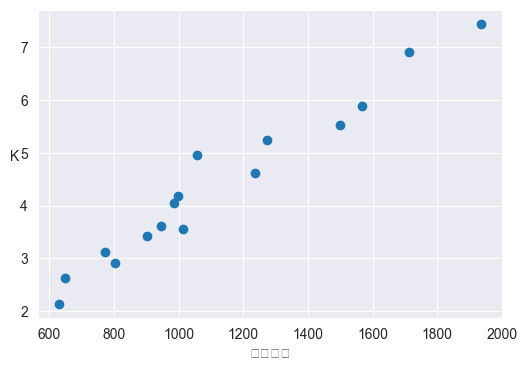

In [56]:
# 산점도 그리기

plt.figure(figsize=(6,4))
plt.scatter(x=k_df['만족거리'], y=k_df['K'])
plt.xlabel('만족거리')
plt.ylabel('K', rotation='horizontal')

plt.show()

<Figure size 600x400 with 0 Axes>

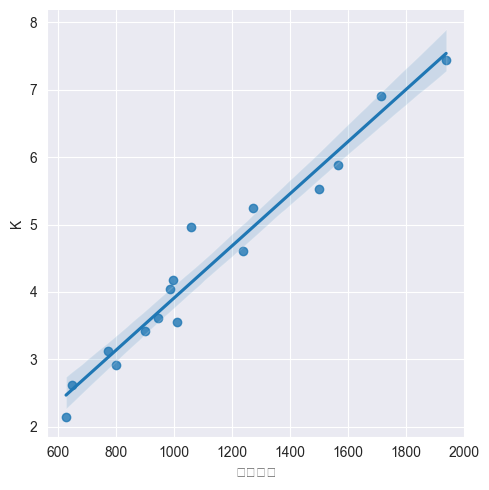

In [57]:
# 회귀선 그리기

plt.figure(figsize=(6,4))
sns.set_style('darkgrid')
sns.lmplot(x='만족거리', y='K', data=k_df, palette='Set1', height=5)
plt.show()

In [84]:
# 회귀분석 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

lr_clf = LinearRegression()

In [85]:
# train, test 데이터 수동으로 분리

X_train = np.array(k_df['만족거리']).reshape(len(k_df), 1)  # X_train
y_train = np.array(k_df['K']).reshape(len(k_df), 1)  # Y_train
X_test = np.array([1,]).reshape(-1, 1)
y_test = np.array([1,]).reshape(-1, 1)

In [86]:
# 학습 및 예측

lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(np.array([300,]).reshape(-1, 1))
y_pred

array([[1.1945395]])

In [88]:
# k값
lr_clf.coef_ * 300 + lr_clf.intercept_  
lr_clf.coef_ * 800 + lr_clf.intercept_  

array([[1.1945395]])

array([[3.13225738]])